In [3]:
##Building the classification model for approve or reject the loan based given variable##

In [2]:
##Downloading the pandas and Reading the given excel##
import pandas as pd
traindata=pd.read_excel('V-customer Dataset.xlsx',sheet_name='Training Data')

In [60]:
m =traindata.select_dtypes(include=['int'])<20
traindata.select_dtypes(include=['int']).where(m,traindata.select_dtypes(include=['int']),axis=0)

,C.ID,Loan Amount Requried,Existing Loan Obligations,Turnover
0,763,150000,18631,19000
1,762,150000,0,8000
2,761,150000,19082,20000
3,759,100000,10413,5000
4,756,150000,1710,6000
...,...,...,...,...
104,553,150000,0,5000
105,550,150000,0,6000
106,539,150000,2415,6000
107,538,150000,0,20000


In [2]:
##checking the information about training data like column data type, number of rows, number of null values and etc## 
Loan_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Created Date               109 non-null    datetime64[ns]
 1   C.ID                       109 non-null    int64         
 2   Loan Amount Requried       109 non-null    int64         
 3   Own House                  109 non-null    object        
 4   Existing Loan Obligations  109 non-null    int64         
 5   Business Segment           109 non-null    object        
 6   Business Product           109 non-null    object        
 7   Turnover                   109 non-null    int64         
 8   Status                     109 non-null    object        
 9   CCT Approved Date          109 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 8.6+ KB


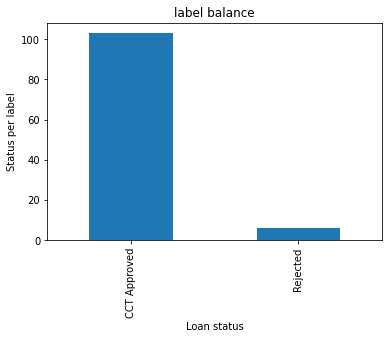

CCT Approved    103
Rejected          6
Name: Status, dtype: int64

In [4]:
##checking the given data is balanced or not and ploting each class using matplotlib##
import matplotlib.pyplot as plt
Loan_traindata['Status'].value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('Loan status')
plt.ylabel('Status per label')
plt.show()
Loan_traindata['Status'].value_counts()

In [ ]:
"""AS we observed above, the given data is highly imbalanced.
Out of 109 sample 103 samples belongs to CCT Approved and 6 belongs to Rejected"""

"""There is high imbalnce between catogeries in given data set.It's not good to build
the on these type dataset. Because model get chance to look into only on class. 
It becomes highly biased towords CCT Approved class"""

"""Even though it's not good build a model on this data set. Will try to build best fit model by using oversampling minority 
class and undersampling the  majority class."""

In [5]:
## first we have to convert the object type columns into numerical type columns using lable endoing and one hot encoder##
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
#applying label endcoding status column. CCT approved marked as 1 and Rejected mark as 0##
Loan_traindata['Status']=label_encoder.fit_transform(Loan_traindata['Status'])
Loan_traindata['Business Product']=label_encoder.fit_transform(Loan_traindata['Business Product'])
onehotencoder = OneHotEncoder()
Business_Segment = onehotencoder.fit_transform(Loan_traindata['Business Segment '].values.reshape(-1,1)).toarray()
Own_House=onehotencoder.fit_transform(Loan_traindata['Own House'].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
Business_Segment = pd.DataFrame(Business_Segment, columns = ["Business_Segment_"+str(int(i)) for i in range(4)]) 
Own_House=pd.DataFrame(Own_House, columns = ["Own_House_"+str(int(i)) for i in range(2)])
Loan_traindata = pd.concat([Loan_traindata,Business_Segment, Own_House], axis=1)
#droping the country columns
Loan_traindata= Loan_traindata.drop(['Business Segment ','Own House'], axis=1) 

In [6]:
##create the new column by substracting the loan approved minus created name. And that columns into minutes
Loan_traindata["timetakenforloan_in_minutes"]=Loan_traindata['CCT Approved Date']-Loan_traindata['Created Date']
for i in range(0,109):
        Loan_traindata["timetakenforloan_in_minutes"][i]=int(Loan_traindata["timetakenforloan_in_minutes"][i].total_seconds() / 60)

C:\Users\Hari vilas\AppData\Local\Temp\ipykernel_20392\2094656838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_traindata["timetakenforloan_in_minutes"][i]=int(Loan_traindata["timetakenforloan_in_minutes"][i].total_seconds() / 60)
C:\Users\Hari vilas\AppData\Local\Temp\ipykernel_20392\2094656838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loan_traindata["timetakenforloan_in_minutes"][i]=int(Loan_traindata["timetakenforloan_in_minutes"][i].total_seconds() / 60)


In [7]:
##Now finding the correlation matrix##
Loan_traindata.corr()
##As we observed in correlation matric, most of the columns are not correlating with Status(target) column. Only Timetakeforlaon and few other columns has correlation with status.##

,C.ID,Loan Amount Requried,Existing Loan Obligations,Business Product,Turnover,Status,Business_Segment_0,Business_Segment_1,Business_Segment_2,Business_Segment_3,Own_House_0,Own_House_1
C.ID,1.000000,0.011142,0.187033,-0.084627,0.149111,-0.268590,0.169166,0.230030,-0.112097,-0.062829,0.059722,-0.059722
Loan Amount Requried,0.011142,1.000000,0.137267,-0.182977,0.409554,-0.055492,0.077407,-0.076180,0.032002,-0.030467,-0.212639,0.212639
Existing Loan Obligations,0.187033,0.137267,1.000000,0.021490,0.473098,-0.129208,0.158564,-0.035921,0.017972,-0.070046,-0.100374,0.100374
Business Product,-0.084627,-0.182977,0.021490,1.000000,-0.142478,-0.183346,-0.152960,0.168818,0.151518,-0.198285,-0.061306,0.061306
Turnover,0.149111,0.409554,0.473098,-0.142478,1.000000,-0.184845,0.168525,-0.035143,0.011925,-0.067714,-0.228899,0.228899
Status,-0.268590,-0.055492,-0.129208,-0.183346,-0.184845,1.000000,-0.032997,-0.040604,0.103750,-0.084891,0.150075,-0.150075
Business_Segment_0,0.169166,0.077407,0.158564,-0.152960,0.168525,-0.032997,1.000000,-0.023000,-0.318048,-0.048087,0.037734,-0.037734
Business_Segment_1,0.230030,-0.076180,-0.035921,0.168818,-0.035143,-0.040604,-0.023000,1.000000,-0.391361,-0.059171,-0.011742,0.011742
Business_Segment_2,-0.112097,0.032002,0.017972,0.151518,0.011925,0.103750,-0.318048,-0.391361,1.000000,-0.818228,-0.039949,0.039949
Business_Segment_3,-0.062829,-0.030467,-0.070046,-0.198285,-0.067714,-0.084891,-0.048087,-0.059171,-0.818228,1.000000,0.036265,-0.036265


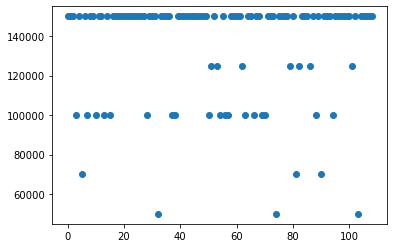

In [8]:
##check the variance of contionus columns in the given data set##
plt.scatter(Loan_traindata.index,Loan_traindata['Loan Amount Requried'])
plt.show()

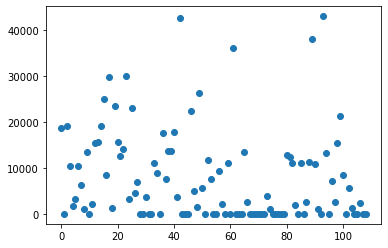

In [9]:
plt.scatter(Loan_traindata.index,Loan_traindata['Existing Loan Obligations'])
plt.show()

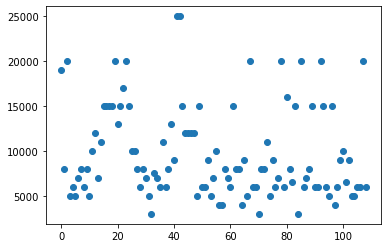

In [10]:
plt.scatter(Loan_traindata.index,Loan_traindata['Turnover'])
plt.show()

In [11]:
##checking data stat##
Loan_traindata.describe()

,C.ID,Loan Amount Requried,Existing Loan Obligations,Business Product,Turnover,Status,Business_Segment_0,Business_Segment_1,Business_Segment_2,Business_Segment_3,Own_House_0,Own_House_1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,656.596330,135183.486239,7971.706422,7.211009,9729.357798,0.055046,0.018349,0.027523,0.844037,0.110092,0.366972,0.633028
std,65.686985,26290.106975,9988.854162,5.128124,5110.597246,0.229123,0.134829,0.164357,0.364496,0.314450,0.484205,0.484205
min,537.000000,50000.000000,0.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,604.000000,125000.000000,0.000000,4.000000,6000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,650.000000,150000.000000,3644.000000,7.000000,8000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,719.000000,150000.000000,12812.000000,10.000000,13000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,763.000000,150000.000000,42987.000000,18.000000,25000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
##Data normailzation for some columns to avoid weight partiallity##
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
#Loan_traindata['Existing Loan Obligations']=preprocessing.normalize(np.array(Loan_traindata['Existing Loan Obligations']))

min_max_columns=scaler.fit_transform(Loan_traindata[['Loan Amount Requried','Existing Loan Obligations','Turnover','timetakenforloan_in_minutes']])
Loan_traindata=Loan_traindata.drop(['Loan Amount Requried','Existing Loan Obligations','Turnover','timetakenforloan_in_minutes'],axis=1)
min_max_columns=pd.DataFrame(min_max_columns,columns=['Loan Amount Requried','Existing Loan Obligations','Turnover','timetakenforloan_in_minutes'])
Loan_traindata=pd.concat([Loan_traindata,min_max_columns],axis=1)

In [15]:
##checking correlation and stats again
Loan_traindata.corr()
Loan_traindata.describe()

,C.ID,Business Product,Status,Business_Segment_0,Business_Segment_1,Business_Segment_2,Business_Segment_3,Own_House_0,Own_House_1,Loan Amount Requried,Existing Loan Obligations,Turnover,timetakenforloan_in_minutes
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,656.596330,7.211009,0.055046,0.018349,0.027523,0.844037,0.110092,0.366972,0.633028,0.851835,0.185445,0.305880,0.143436
std,65.686985,5.128124,0.229123,0.134829,0.164357,0.364496,0.314450,0.484205,0.484205,0.262901,0.232369,0.232300,0.167619
min,537.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,604.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.136364,0.045897
50%,650.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.084770,0.227273,0.082594
75%,719.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.298044,0.454545,0.151225
max,763.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.Series([variance_inflation_factor(Loan_traindata1.values, i)   
               for i in range(Loan_traindata1.shape[1])],   
              index=Loan_traindata1.columns)  
print(vif) 

Business Product              1.064676
Own_House_0                   5.873240
Own_House_1                  11.979227
Loan Amount Requried          1.256633
Existing Loan Obligations     1.306303
Turnover                      1.582727
dtype: float64


In [16]:
##selecting below mentioned features for the model only based correlation and VIF
Loan_traindata1=Loan_traindata[['Business Product','Own_House_0','Own_House_1',
       'Loan Amount Requried', 'Existing Loan Obligations',
       'Turnover']].astype('float')

In [18]:
y=Loan_traindata['Status']
x=Loan_traindata1

In [19]:
##applying oversampling minority class##
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

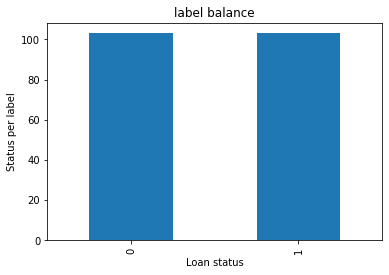

0    103
1    103
Name: Status, dtype: int64

In [23]:
y_smote.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('Loan status')
plt.ylabel('Status per label')
plt.show()
y_smote.value_counts()

In [24]:
##Checking the correlation after oversampling of minority class##
pd.concat([x_smote,y_smote],axis=1).corr()

,Business Product,Own_House_0,Own_House_1,Loan Amount Requried,Existing Loan Obligations,Turnover,Status
Business Product,1.000000,-0.092954,0.092954,-0.080550,0.104104,0.100490,-0.493867
Own_House_0,-0.092954,1.000000,-1.000000,-0.219054,-0.269880,-0.250277,0.295028
Own_House_1,0.092954,-1.000000,1.000000,0.219054,0.269880,0.250277,-0.295028
Loan Amount Requried,-0.080550,-0.219054,0.219054,1.000000,0.147402,0.349173,-0.108695
Existing Loan Obligations,0.104104,-0.269880,0.269880,0.147402,1.000000,0.524957,-0.322934
Turnover,0.100490,-0.250277,0.250277,0.349173,0.524957,1.000000,-0.490010
Status,-0.493867,0.295028,-0.295028,-0.108695,-0.322934,-0.490010,1.000000


In [25]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3,random_state=109) # 70% training and 30% test

Accuracy: 0.8870967741935484
Precision: 0.8055555555555556
Recall: 1.0


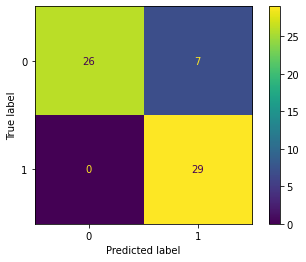

,feature,feature_importance
5,Turnover,4.114278
4,Existing Loan Obligations,1.906460
2,Own_House_1,0.488589
1,Own_House_0,0.488589
0,Business Product,0.373798
3,Loan Amount Requried,0.101577


In [26]:
##applying SVM model
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset

y_pred = svm_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
##feature importance 
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[abs(i) for i in svm_clf.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

Accuracy: 0.8225806451612904
Precision: 0.78125
Recall: 0.8620689655172413


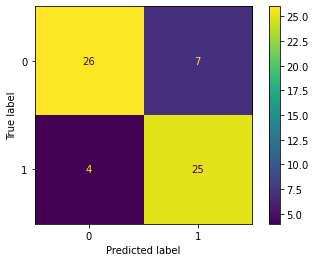

,feature,feature_importance
5,Turnover,2.705634
4,Existing Loan Obligations,1.764443
1,Own_House_0,0.777154
2,Own_House_1,0.777151
3,Loan Amount Requried,0.742320
0,Business Product,0.467576


In [27]:
##applying logistic regression model
#Import logistic regression model
from sklearn import linear_model
log_clf = linear_model.LogisticRegression()
#Train the model using the training sets
log_clf.fit(X_train, y_train)

#Predict the response for test dataset

y_pred = log_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
##feature importance
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[abs(i) for i in log_clf.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

Accuracy: 0.8387096774193549
Precision: 0.8518518518518519
Recall: 0.7931034482758621


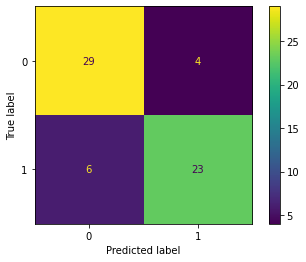

[ 0.17741935 -0.04516129 -0.04516129  0.         -0.01612903  0.06774194]


In [28]:
##applying naive_bayes model
#Import naive_bayes model
from sklearn.naive_bayes import GaussianNB
GaussianNB_clf = GaussianNB()
GaussianNB_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = GaussianNB_clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
##feature importance
from sklearn.inspection import permutation_importance
fimps = permutation_importance(GaussianNB_clf, X_test, y_test)
print(fimps.importances_mean)

In [ ]:
""" Support vector machine classifiers is good amomng SVM,Logistic regression and GaussianNB model.
SO Making the predictions for test using SVC"""

In [29]:
##Preparing the Test for prediction
Loan_testdata=pd.read_excel('V-customer Dataset.xlsx',sheet_name='Testing Data')
## first we have to convert the object type columns into numerical type columns using lable endoing and one hot encoder##
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
Loan_testdata['Business Product']=label_encoder.fit_transform(Loan_testdata['Business Product'])
onehotencoder = OneHotEncoder()
Business_Segment = onehotencoder.fit_transform(Loan_testdata['Business Segment '].values.reshape(-1,1)).toarray()
Own_House=onehotencoder.fit_transform(Loan_testdata['Own House'].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
Business_Segment = pd.DataFrame(Business_Segment, columns = ["Business_Segment_"+str(int(i)) for i in range(3)]) 
Own_House=pd.DataFrame(Own_House, columns = ["Own_House_"+str(int(i)) for i in range(2)])
Loan_testdata = pd.concat([Loan_testdata,Business_Segment, Own_House], axis=1)
#droping the country columns
Loan_testdata= Loan_testdata.drop(['Business Segment ','Own House'], axis=1) 
# Loan_testdata["timetakenforloan_in_minutes"]=Loan_testdata['CCT Approved Date']-Loan_testdata['Created Date']
# for i in range(0,36):
#         Loan_testdata["timetakenforloan_in_minutes"][i]=int(Loan_testdata["timetakenforloan_in_minutes"][i].total_seconds() / 60)
##Data normailzation for some columns to avoid weight partiallity##
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
#Loan_testdata['Existing Loan Obligations']=preprocessing.normalize(np.array(Loan_testdata['Existing Loan Obligations']))

min_max_columns=scaler.fit_transform(Loan_testdata[['Loan Amount Requried','Existing Loan Obligations','Turnover']])
Loan_testdata=Loan_testdata.drop(['Loan Amount Requried','Existing Loan Obligations','Turnover'],axis=1)
min_max_columns=pd.DataFrame(min_max_columns,columns=['Loan Amount Requried','Existing Loan Obligations','Turnover'])
Loan_testdata=pd.concat([Loan_testdata,min_max_columns],axis=1)

C:\Users\Hari vilas\AppData\Local\Temp\ipykernel_20392\1109684114.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  Loan_testdata=pd.read_excel('V-customer Dataset.xlsx',sheet_name='Testing Data')


In [38]:
##making the predictions for test data using GaussianNB and SVC###
X_test=Loan_testdata[['Business Product','Own_House_0','Own_House_1',
       'Loan Amount Requried', 'Existing Loan Obligations',
       'Turnover']]
svm_clf_pred = svm_clf.predict(X_test)

In [39]:
##converting the prediction array into datframe
Status=pd.DataFrame(svm_clf_pred,columns=['Status'])

In [40]:
##reading the original given test and concatinating with model prediction as Status column##
testdata_with_results=pd.read_excel('V-customer Dataset.xlsx',sheet_name='Testing Data')
testdata_with_results=pd.concat([testdata_with_results,Status],axis=1)

C:\Users\Hari vilas\AppData\Local\Temp\ipykernel_20392\2051455448.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  testdata_with_results=pd.read_excel('V-customer Dataset.xlsx',sheet_name='Testing Data')


In [50]:
##Reconverting the 1 and 0 to CCT Approved and Rejected##
testdata_with_results.loc[testdata_with_results['Status']==0,'CCT Status']="CCT Approved"
testdata_with_results.loc[testdata_with_results['Status']==1,'CCT Status']='Rejected'

In [53]:
##Droping the Status column##
testdata_with_results=testdata_with_results.drop(["Status"],axis=1)

In [54]:
##saving the given train data with Results##
testdata_with_results.to_csv('testdata_with_results.csv')